In [436]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ciudad1/PRSA_Data_Aotizhongxin_20130301-20170228.csv


<h2> Preprocesamiento de datos
    

<h3> Importar los datos proporcionados de la ciudad de Aotizhongxin desde el archivo CSV.

In [437]:
dataCruda = pd.read_csv('/kaggle/input/ciudad1/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
print(dataCruda.head(10))

# Verificar si existen valores NaN en el DataFrame
if dataCruda.isna().any().any():
    print("Existen valores NaN en el DataFrame")
else:
    print("No existen valores NaN en el DataFrame")


   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
5   6  2013      3    1     5    5.0   5.0  18.0  18.0  400.0  66.0  -2.2   
6   7  2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0  -2.6   
7   8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0  -1.6   
8   9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   0.1   
9  10  2013      3    1     9    3.0   8.0  12.0  28.0  400.0  59.0   1.2   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  10

<h3> Verificar la calidad de los datos, identificar y manejar los valores faltantes, duplicados o inconsistentes.

In [438]:
# Eliminar filas con valores NaN
data = dataCruda.dropna()
print(dataCruda.head(10))


   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
5   6  2013      3    1     5    5.0   5.0  18.0  18.0  400.0  66.0  -2.2   
6   7  2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0  -2.6   
7   8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0  -1.6   
8   9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   0.1   
9  10  2013      3    1     9    3.0   8.0  12.0  28.0  400.0  59.0   1.2   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  10

<h3> Se procede a validar que no existan registros con NA

In [439]:
# Verificar si existen valores NaN en el DataFrame
if data.isna().any().any():
    print("Existen valores NaN en el DataFrame")
else:
    print("No existen valores NaN en el DataFrame")
    print(type(data))
  

No existen valores NaN en el DataFrame
<class 'pandas.core.frame.DataFrame'>


<h3> Realizar la limpieza de datos necesaria; eliminar valores outliers.

In [440]:
# Definir función para identificar outliers utilizando el método de los límites de Tukey
def tukey_outliers(data, column):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    outliers = data[(data[column] > upper_limit) | (data[column] < lower_limit)]
    return outliers

# Identificar outliers en las columnas relevantes
outliers_SO2 = tukey_outliers(data, 'SO2')
outliers_NO2 = tukey_outliers(data, 'NO2')
outliers_PM10 = tukey_outliers(data, 'PM10')
outliers_CO = tukey_outliers(data, 'CO')
outliers_O3 = tukey_outliers(data, 'O3')

# Combinar todos los outliers en un dataFrame
all_outliers = pd.concat([outliers_SO2, outliers_NO2, outliers_PM10, outliers_CO, outliers_O3])

# Eliminar las filas con outliers del dataFrame original
data = data.drop(all_outliers.index)

# Reiniciar los índices del DataFrame
data.reset_index(drop=True, inplace=True)

# Imprimir el dataFrame actualizado sin los outliers
print(data)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
25926  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
25927  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
25928  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
25929  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
25930  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0   

<h3> Realizar la limpieza de datos necesaria; eliminar columnas irrelevantes.

In [441]:
data.drop('station', axis=1, inplace=True)
# Imprimir el dataFrame actualizado sin columnas  irrelevantes (station)
print(data)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
25926  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
25927  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
25928  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
25929  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
25930  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  
0      -0.7  1023.

<h3> Aplicar técnicas de preprocesamiento; codificación de variables categóricas (WD)

In [442]:
# Codificar variables categóricas
categorical_features = ['wd']
encoder = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')


<h2> Analisis exploratorio de los datos
    

<h3> Resumen estadístico de los datos.

In [443]:
# Obtener el resumen estadístico de las variables
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000
mean,18051.203502,2014.721723,6.525279,15.691412,11.453280,60.483838,84.738282,10.704189,51.852759,897.287147,54.339418,14.639564,1011.493979,3.764429,0.081443,1.767884
std,9993.137712,1.166904,3.244493,8.791221,6.960841,55.030635,65.957013,10.498739,30.462278,603.449849,46.694846,10.784589,10.412695,14.088958,0.920036,1.243613
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,10010.500000,2014.000000,4.000000,8.000000,6.000000,17.000000,31.000000,3.000000,27.000000,400.000000,12.000000,5.400000,1003.000000,-8.200000,0.000000,0.900000
50%,18449.000000,2015.000000,7.000000,16.000000,11.000000,44.000000,69.000000,7.000000,48.000000,700.000000,47.000000,16.400000,1010.500000,5.700000,0.000000,1.500000
75%,26863.500000,2016.000000,9.000000,23.000000,18.000000,87.000000,123.000000,15.000000,71.000000,1200.000000,82.000000,23.500000,1019.700000,16.400000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,366.000000,329.000000,48.000000,160.000000,3000.000000,193.000000,40.100000,1042.000000,28.500000,46.400000,11.200000


<h3> Medidas de tendencia central; aplicado al campo PM10.

In [444]:
# Calcular la media de PM10
media =data['PM10'].mean()

# Calcular la mediana
mediana= data['PM10'].median()

# Calcular la moda 
moda= data['PM10'].mode()

print("Media de PM10:", media)
print("Mediana de PM10:", mediana)
print("Moda de PM10:", moda)


Media de PM10: 84.7382823647372
Mediana de PM10: 69.0
Moda de PM10: 0    6.0
Name: PM10, dtype: float64


<h3> Dispersión de los datos; aplicado al campo PM10.

In [445]:
# Calcular la desviación estándar de PM10
desviacion = data['PM10'].std()

# Calcular el rango de PM10
rango= data['PM10'].max() - data['PM10'].min()

# Calcular el coeficiente de PM10
coeficiente = data['PM10'].std() / data['PM10'].mean()

print("Desviación estandar de PM10:", desviacion)
print("Rango:", rango)
print("Coeficiente de Varianción de PM10:", coeficiente)


Desviación estandar de PM10: 65.95701312735798
Rango: 327.0
Coeficiente de Varianción de PM10: 0.7783614593869227


<h3> Correlación de variables

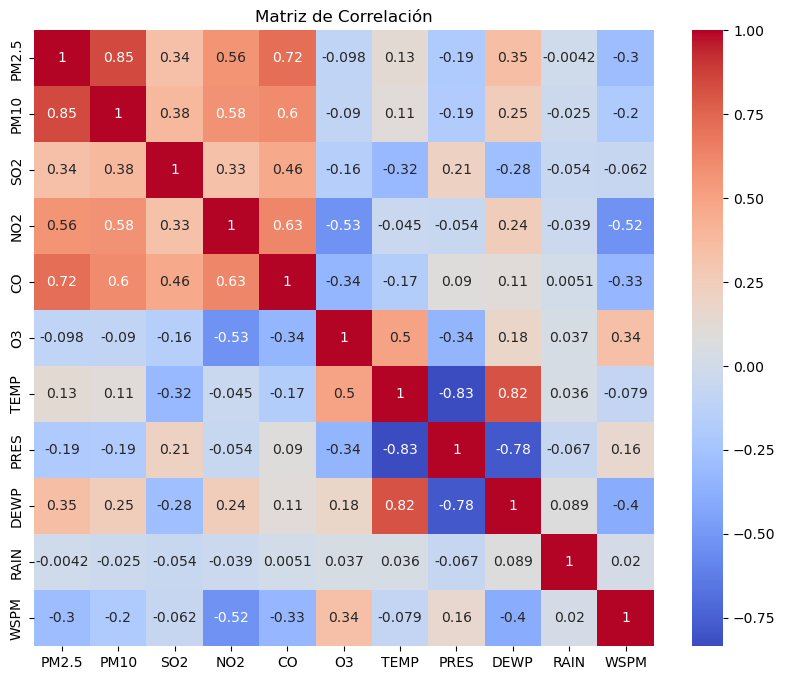

In [446]:
# Variables numéricas
variables_numericas = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Subconjunto del dataFrame con las varaibles numericas seleccionadas 
data_numericas = data[variables_numericas]

# matriz de correlación
correlation_matrix = data_numericas.corr()

# Visualizar la matriz un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


<h3>Preguntas formuladas
    

<h3> ¿Cuál es la distribución de las variables relacionadas con la contaminación del aire? 

<h3> Gráfico de distribución de niveles de los contaminantes separados.

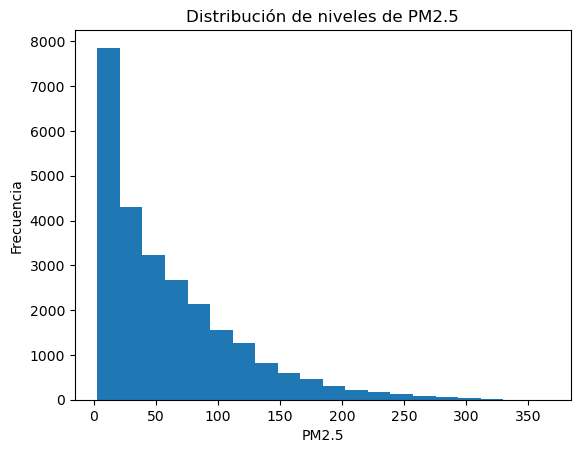

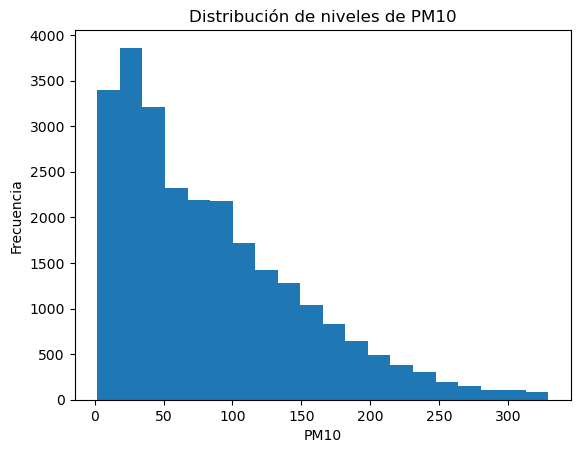

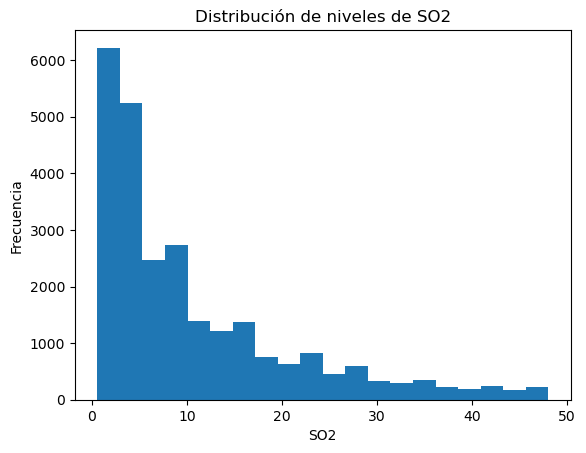

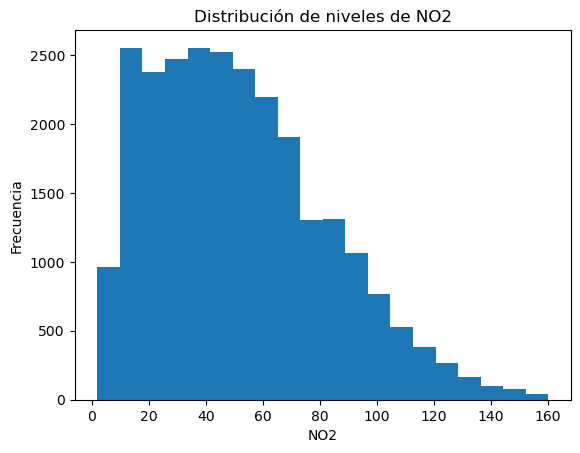

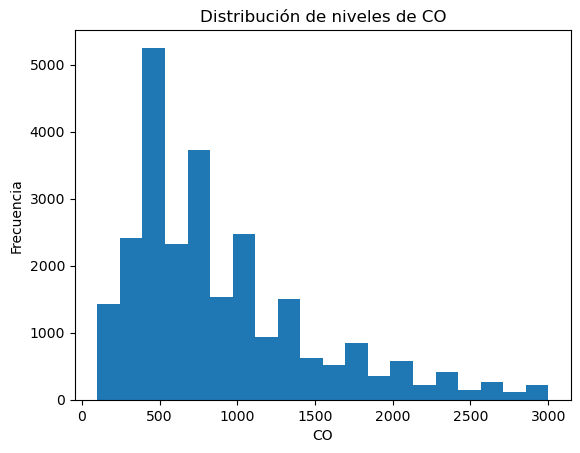

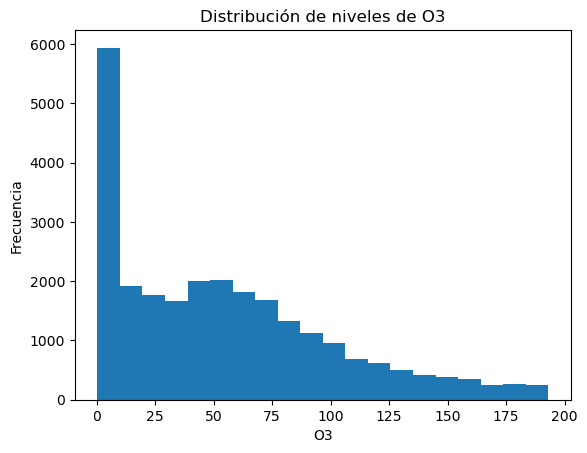

In [447]:
# Crear un histograma para PM2.5
plt.hist(data['PM2.5'], bins=20)
plt.xlabel('PM2.5')
plt.ylabel('Frecuencia')
plt.title('Distribución de niveles de PM2.5')
plt.show()

# Crear un histograma para PM10
plt.hist(data['PM10'], bins=20)
plt.xlabel('PM10')
plt.ylabel('Frecuencia')
plt.title('Distribución de niveles de PM10')
plt.show()

# Crear un histograma para SO2
plt.hist(data['SO2'], bins=20)
plt.xlabel('SO2')
plt.ylabel('Frecuencia')
plt.title('Distribución de niveles de SO2')
plt.show()

# Crear un histograma para NO2
plt.hist(data['NO2'], bins=20)
plt.xlabel('NO2')
plt.ylabel('Frecuencia')
plt.title('Distribución de niveles de NO2')
plt.show()

# Crear un histograma para CO
plt.hist(data['CO'], bins=20)
plt.xlabel('CO')
plt.ylabel('Frecuencia')
plt.title('Distribución de niveles de CO')
plt.show()

# Crear un histograma para O3
plt.hist(data['O3'], bins=20)
plt.xlabel('O3')
plt.ylabel('Frecuencia')
plt.title('Distribución de niveles de O3')
plt.show()

<h3> Gráfico de distribución de niveles de los contaminantes.

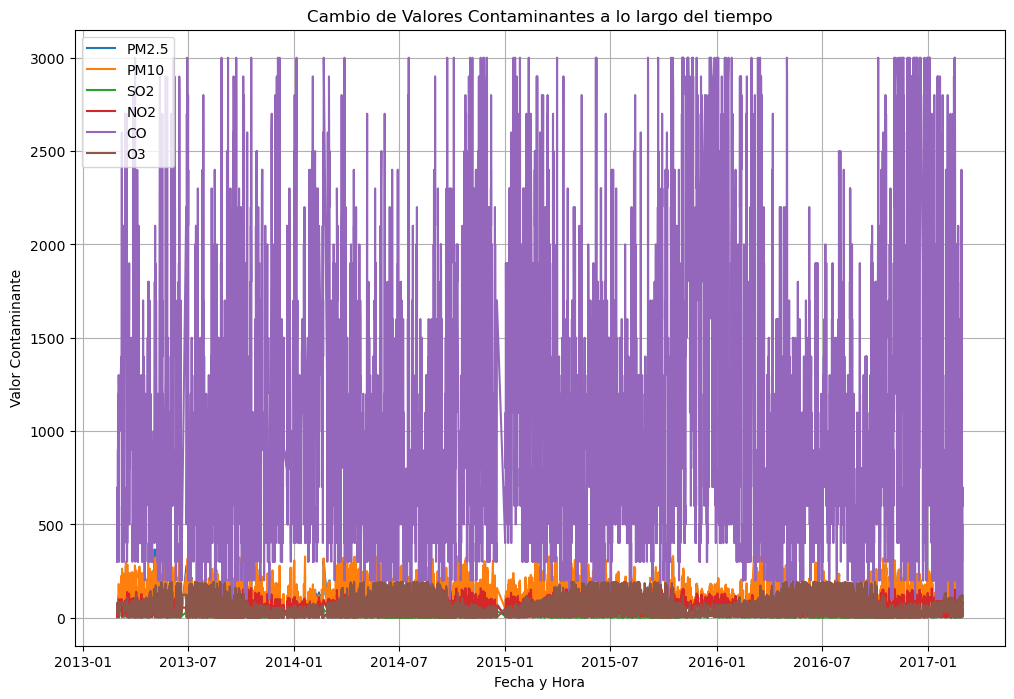

In [448]:

# Crear una copia del DataFrame 
data_copy = data.copy()

# Crear una columna de fecha y hora combinada 
data_copy['Fecha_Hora'] = pd.to_datetime(data_copy[['year', 'month', 'day', 'hour']])

# Ordenar el aFrame por la columna de fecha y hora
data_copy = data_copy.sort_values(by='Fecha_Hora')

# Configurar el índice del DataFrame como la columna de fecha y hora
data_copy.set_index('Fecha_Hora', inplace=True)

# Tomar en cuenta las columnas relevantes para el gráfico
columnas_grafico = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Grfico de series de tiempo
plt.figure(figsize=(12, 8))
for columna in columnas_grafico:
    plt.plot(data_copy.index, data_copy.loc[:, columna], label=columna)
    
plt.xlabel('Fecha y Hora')
plt.ylabel('Valor Contaminante')
plt.title('Cambio de Valores Contaminantes a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


### 

<h3> ¿Existe alguna relación entre las variables ambientales y los niveles de contaminantes?

/tmp/ipykernel_32/2764997187.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[variables_ambientales + contaminantes].corr()


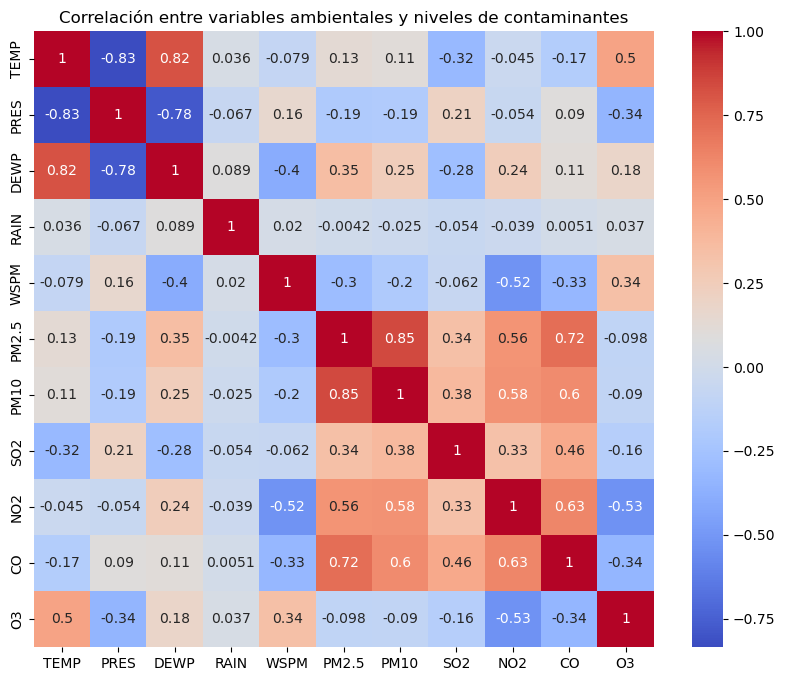

In [449]:
# Matriz de correlación entre variables ambientales y niveles de contaminantes
variables_ambientales = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']
contaminantes = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

correlation_matrix = data[variables_ambientales + contaminantes].corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables ambientales y niveles de contaminantes')
plt.show()

dssd

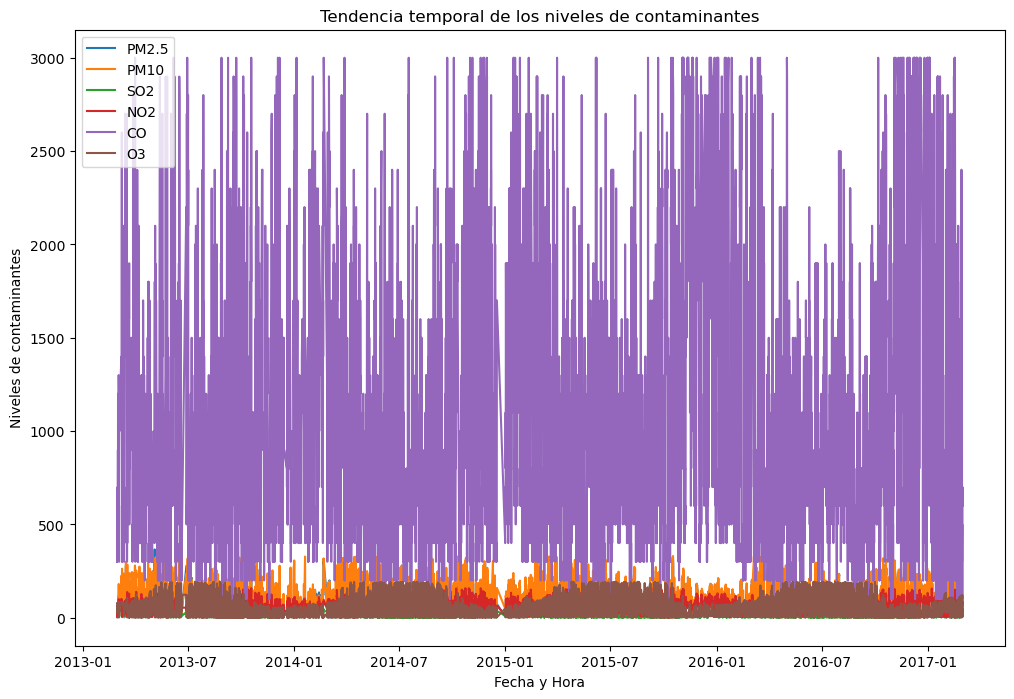

In [450]:
# Crear una variable de fecha y hora combinada
data['DateTime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Gráfico de línea de los niveles de contaminantes a lo largo del tiempo
plt.figure(figsize=(12, 8))
plt.plot(data['DateTime'], data['PM2.5'], label='PM2.5')
plt.plot(data['DateTime'], data['PM10'], label='PM10')
plt.plot(data['DateTime'], data['SO2'], label='SO2')
plt.plot(data['DateTime'], data['NO2'], label='NO2')
plt.plot(data['DateTime'], data['CO'], label='CO')
plt.plot(data['DateTime'], data['O3'], label='O3')
plt.xlabel('Fecha y Hora')
plt.ylabel('Niveles de contaminantes')
plt.title('Tendencia temporal de los niveles de contaminantes')
plt.legend()
plt.show()


dcc

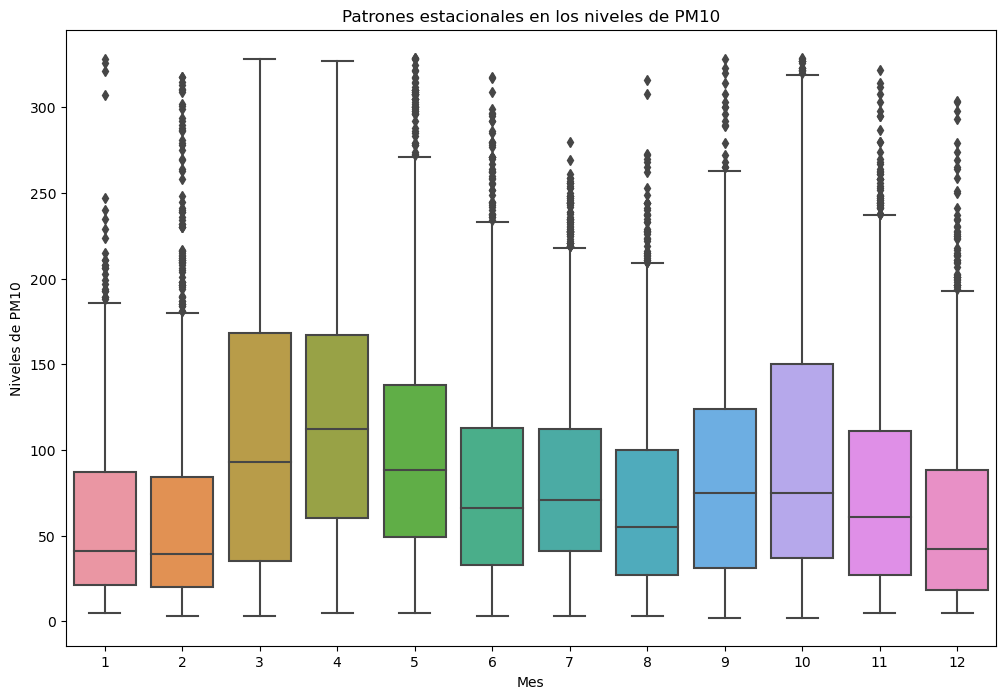

In [451]:
# Extraer el mes y el año de la variable de fecha y hora
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

# Boxplot de los niveles de contaminantes por mes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='PM10', data=data)
plt.xlabel('Mes')
plt.ylabel('Niveles de PM10')
plt.title('Patrones estacionales en los niveles de PM10')
plt.show()


<h2> Modelado predictivo

<h3> Calcular puntuaciones individuales para cada contaminante, utilizando las fórmulas específicas correspondientes a cada uno.

In [452]:

def calculate_SO2_AQI(SO2):
    if 0 <= SO2 <= 50:
        return (50 / 50) * SO2
    elif 50 < SO2 <= 150:
        return ((100 - 51) / (150 - 51)) * (SO2 - 51) + 51
    elif 150 < SO2 <= 475:
        return ((150 - 101) / (475 - 151)) * (SO2 - 151) + 101
    elif 475 < SO2 <= 800:
        return ((200 - 151) / (800 - 476)) * (SO2 - 476) + 151
    elif 800 < SO2 <= 1600:
        return ((300 - 201) / (1600 - 801)) * (SO2 - 801) + 201
    elif 1600 < SO2 <= 2100:
        return ((400 - 301) / (2100 - 1601)) * (SO2 - 1601) + 301
    elif 2100 < SO2 <= 2620:
        return ((500 - 401) / (2620 - 2101)) * (SO2 - 2101) + 401
    elif 2620 < SO2 <= 3160:
        return ((600 - 501) / (3160 - 2621)) * (SO2 - 2621) + 501
    else:
        return -1  # Valor fuera de rango
    

def calculate_NO2_AQI(NO2):
    if 0 <= NO2 <= 40:
        return (50 / 40) * NO2
    elif 40 < NO2 <= 80:
        return ((100 - 51) / (80 - 41)) * (NO2 - 41) + 51
    elif 80 < NO2 <= 180:
        return ((150 - 101) / (180 - 81)) * (NO2 - 81) + 101
    elif 180 < NO2 <= 280:
        return ((200 - 151) / (280 - 181)) * (NO2 - 181) + 151
    elif 280 < NO2 <= 565:
        return ((300 - 201) / (565 - 281)) * (NO2 - 281) + 201
    elif 565 < NO2 <= 750:
        return ((400 - 301) / (750 - 566)) * (NO2 - 566) + 301
    elif 750 < NO2 <= 940:
        return ((500 - 401) / (940 - 751)) * (NO2 - 751) + 401
    elif 940 < NO2 <= 1180:
        return ((600 - 501) / (1180 - 941)) * (NO2 - 941) + 501
    else:
        return -1  # Valor fuera de rango

def calculate_PM10_AQI(PM10):
    if 0 <= PM10 <= 50:
        return (50 / 50) * PM10
    elif 50 < PM10 <= 150:
        return ((100 - 51) / (150 - 51)) * (PM10 - 51) + 51
    elif 150 < PM10 <= 250:
        return ((150 - 101) / (250 - 151)) * (PM10 - 151) + 101
    elif 250 < PM10 <= 350:
        return ((200 - 151) / (350 - 251)) * (PM10 - 251) + 151
    elif 350 < PM10 <= 420:
        return ((300 - 201) / (420 - 351)) * (PM10 - 351) + 201
    elif 420 < PM10 <= 500:
        return ((400 - 301) / (500 - 421)) * (PM10 - 421) + 301
    elif 500 < PM10 <= 600:
        return ((500 - 401) / (600 - 501)) * (PM10 - 501) + 401
    elif 600 < PM10 <= 700:
        return ((600 - 501) / (700 - 601)) * (PM10 - 601) + 501
    else:
        return -1  # Valor fuera de rango


def calculate_CO_AQI(CO):
        if 0 <= CO <= 4.4:
            return (50 / 4.4) * CO
        elif 4.4 < CO <= 9.4:
            return ((100 - 51) / (9.4 - 4.5)) * (CO - 4.5) + 51
        elif 9.4 < CO <= 12.4:
            return ((150 - 101) / (12.4 - 9.5)) * (CO - 9.5) + 101
        elif 12.4 < CO <= 15.4:
            return ((200 - 151) / (15.4 - 12.5)) * (CO - 12.5) + 151
        elif 15.4 < CO <= 30.4:
            return ((300 - 201) / (30.4 - 15.5)) * (CO - 15.5) + 201
        elif 30.4 < CO <= 40.4:
            return ((400 - 301) / (40.4 - 30.5)) * (CO - 30.5) + 301
        elif 40.4 < CO <= 50.4:
            return ((500 - 401) / (50.4 - 40.5)) * (CO - 40.5) + 401
        elif 50.4 < CO <= 60.4:
            return ((600 - 501) / (60.4 - 50.5)) * (CO - 50.5) + 501
        else:
            return -1  # Valor fuera de rango


def calculate_O3_AQI(O3):
    if 0 <= O3 <= 54:
        return (50 / 54) * O3
    elif 55 <= O3 <= 70:
        return ((100 - 51) / (70 - 55)) * (O3 - 55) + 51
    elif 71 <= O3 <= 85:
        return ((150 - 101) / (85 - 71)) * (O3 - 71) + 101
    elif 86 <= O3 <= 105:
        return ((200 - 151) / (105 - 86)) * (O3 - 86) + 151
    elif 106 <= O3 <= 200:
        return ((300 - 201) / (200 - 106)) * (O3 - 106) + 201
    elif 201 <= O3 <= 504:
        return ((400 - 301) / (504 - 201)) * (O3 - 201) + 301
    elif 505 <= O3 <= 604:
        return ((500 - 401) / (604 - 505)) * (O3 - 505) + 401
    elif 605 <= O3 <= 804:
        return ((600 - 501) / (804 - 605)) * (O3 - 605) + 501
    else:
        return -1  # Valor fuera de rango



<h3> Comparar las puntuaciones AQI individuales de cada contaminante y seleccionar la puntuación más alta.

El valor final del AQI será la puntuación más alta obtenida.

In [453]:
data.reset_index(drop=True, inplace=True)

# Calcular el AQI para cada fila del DataFrame
data['AQI_SO2'] = data['SO2'].map(calculate_SO2_AQI)
data['AQI_NO2'] = data['NO2'].map(calculate_NO2_AQI)
data['AQI_PM10'] = data['PM10'].map(calculate_PM10_AQI)
data['AQI_CO'] = data['CO'].map(calculate_CO_AQI)
data['AQI_O3'] = data['O3'].map(calculate_O3_AQI)

# Calcular el AQI máximo en cada fila
data['Max_AQI'] = data[['AQI_SO2', 'AQI_NO2', 'AQI_PM10', 'AQI_CO', 'AQI_O3']].max(axis=1)

# Imprimir el DataFrame con los valores de AQI calculados
print(data[['SO2', 'AQI_SO2', 'NO2', 'AQI_NO2', 'PM10', 'AQI_PM10', 'CO', 'AQI_CO', 'O3', 'AQI_O3']])




        SO2  AQI_SO2   NO2     AQI_NO2  PM10  AQI_PM10     CO  AQI_CO    O3  \
0       4.0      4.0   7.0    8.750000   4.0       4.0  300.0      -1  77.0   
1       4.0      4.0   7.0    8.750000   8.0       8.0  300.0      -1  77.0   
2       5.0      5.0  10.0   12.500000   7.0       7.0  300.0      -1  73.0   
3      11.0     11.0  11.0   13.750000   6.0       6.0  300.0      -1  72.0   
4      12.0     12.0  12.0   15.000000   3.0       3.0  300.0      -1  72.0   
...     ...      ...   ...         ...   ...       ...    ...     ...   ...   
25926   5.0      5.0  35.0   43.750000  29.0      29.0  400.0      -1  95.0   
25927   7.0      7.0  45.0   56.025641  37.0      37.0  500.0      -1  81.0   
25928  10.0     10.0  66.0   82.410256  37.0      37.0  700.0      -1  58.0   
25929  12.0     12.0  87.0  103.969697  44.0      44.0  700.0      -1  35.0   
25930  10.0     10.0  79.0   98.743590  31.0      31.0  600.0      -1  42.0   

           AQI_O3  
0      122.000000  
1      122.

<h3> Tarea Predictiva

<h3>El modelo sugerido para el estudio es un modelo de regresión de bosques aleatorios (Random Forest Regressor), que es una elección adecuada para la tarea de predicción de una variable continua como el nivel de contaminación del aire: PM10.

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'DateTime',
       'Month', 'Year', 'AQI_SO2', 'AQI_NO2', 'AQI_PM10', 'AQI_CO', 'AQI_O3',
       'Max_AQI'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
0
Error cuadrático medio (MSE): 0.00019555638792853475
Coeficiente de determinación R^2: 0.9999998656986252


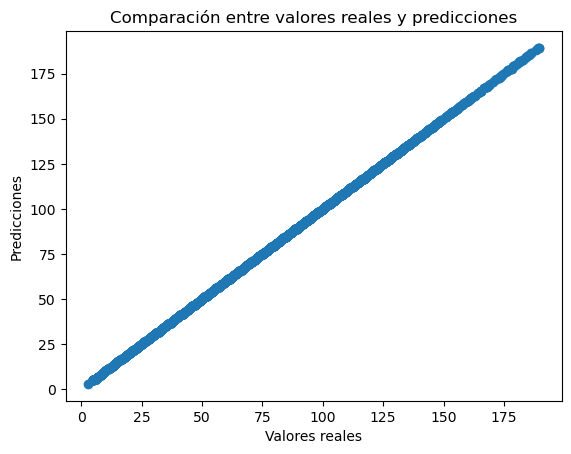

In [454]:
print(data.columns)
print(type(data))
print(data['wd'].isnull().sum())
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Seleccionar características de entrada (X) y variable objetivo (y)
features = ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']
target = 'AQI_PM10'

X = data[features]
y = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar variables categóricas
categorical_features = ['wd']
encoder = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Crear y entrenar el modelo 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test_encoded)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación R^2:', r2)

# Graficar las predicciones y los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.show()



<h3> Ajuste del modelo  <br>Realizar una búsqueda exhaustiva en la cuadrícula de hiperparámetros especificada y encontrar los mejores hiperparámetros para un modelo de regresión de bosques aleatorios.

Error cuadrático medio (MSE) del mejor modelo: 0.00018871567086466886
Coeficiente de determinación R^2 del mejor modelo: 0.9999998703965934


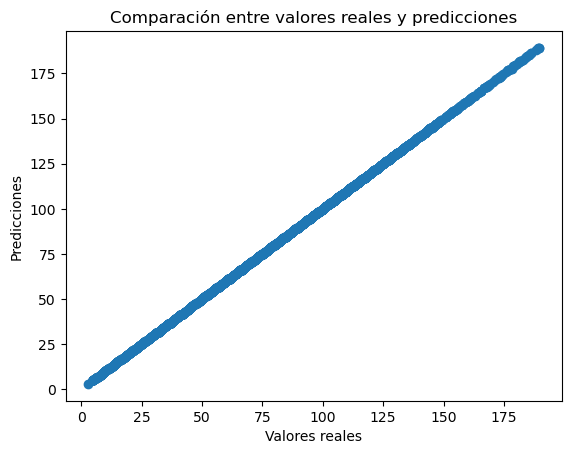

In [455]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_encoded, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test_encoded)

# Evaluar el rendimiento del mejor modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio (MSE) del mejor modelo:', mse)

# Calcular el coeficiente de determinación R^2 del mejor modelo
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación R^2 del mejor modelo:', r2)

# Graficar las predicciones y los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.show()
